# Classifying Movie Reviews (IMDB)
#### El conjunto de datos IMDB es ampliamente utilizado en aprendizaje profundo para la clasificación de sentimientos en críticas de películas. Contiene reseñas de usuarios etiquetadas como positivas o negativas, lo que permite entrenar un modelo de clasificación binaria. Este dataset contiene:

#### - 25,000 críticas de películas para entrenamiento.
#### - 25,000 críticas de películas para prueba.
#### - Cada reseña se representa como una secuencia de enteros, donde cada número corresponde a una palabra en el vocabulario.

## Importar Librerías

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

## Definir el Número de Palabras a Considerar

In [7]:
# Definir la cantidad de palabras a considerar en el dataset
num_words = 10000  # Se pueden usar más o menos palabras según el caso

## Cargar el Dataset IMDB

In [8]:
from tensorflow.keras.datasets import imdb

# Cargar el conjunto de datos con el número de palabras definido
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Mostrar algunas estadísticas del dataset
print(f"Cantidad de reseñas en el conjunto de entrenamiento: {len(train_data)}")
print(f"Cantidad de reseñas en el conjunto de prueba: {len(test_data)}")

# Ver el tamaño de algunas reseñas
print(f"Longitud de la primera reseña: {len(train_data[0])}")
print(f"Longitud de la segunda reseña: {len(train_data[1])}")

Cantidad de reseñas en el conjunto de entrenamiento: 25000
Cantidad de reseñas en el conjunto de prueba: 25000
Longitud de la primera reseña: 218
Longitud de la segunda reseña: 189


## Obtener el Diccionario de Palabras

In [9]:
# Obtener el diccionario de palabras de IMDB
word_index = imdb.get_word_index()

# Ajustar índices en el diccionario
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # Palabras desconocidas
word_index["<UNUSED>"] = 3

# Invertir el diccionario para decodificar críticas
reverse_word_index = {v: k for k, v in word_index.items()}

## Preprocesamiento de Datos

In [10]:
# Función para vectorizar las secuencias
def vectorize_sequences(sequences, dimension=num_words):
    results = np.zeros((len(sequences), dimension))  # Crear una matriz de ceros
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0  # Poner 1 en los índices de palabras presentes
    return results

# Convertir datos en representaciones binarias
x_train = vectorize_sequences(train_data, dimension=num_words)
x_test = vectorize_sequences(test_data, dimension=num_words)

# Convertir etiquetas en arreglos float32
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")


## Definir y entrenar el modelo

In [12]:
model = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(num_words,)),  # Capa oculta 1
    layers.Dense(16, activation="relu"),  # Capa oculta 2
    layers.Dense(1, activation="sigmoid")  # Capa de salida para clasificación binaria
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_split=0.2)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6023 - loss: 0.6334 - val_accuracy: 0.7888 - val_loss: 0.4858
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8747 - loss: 0.4188 - val_accuracy: 0.8804 - val_loss: 0.3429
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9160 - loss: 0.2819 - val_accuracy: 0.8878 - val_loss: 0.2899
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9302 - loss: 0.2198 - val_accuracy: 0.8792 - val_loss: 0.2949
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9405 - loss: 0.1794 - val_accuracy: 0.8906 - val_loss: 0.2786
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9530 - loss: 0.1499 - val_accuracy: 0.8872 - val_loss: 0.2815
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9573 - loss: 0.1340 - val_accuracy: 0.8836 - val_loss: 0.3105
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9635 - loss: 0.1152 - val_accuracy: 0.8792 - val_loss

## Evaluar el modelo

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step - accuracy: 0.8736 - loss: 0.3829 

Precisión en el conjunto de prueba: 0.8744
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step 


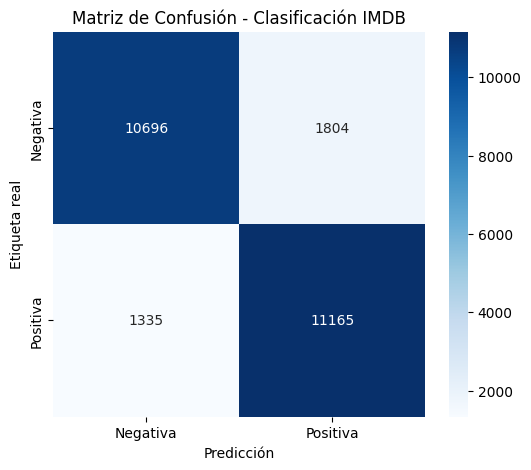


Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.87     12500
         1.0       0.86      0.89      0.88     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



In [13]:
# Evaluar en el conjunto de prueba
results = model.evaluate(x_test, y_test)
print(f"\nPrecisión en el conjunto de prueba: {results[1]:.4f}")

# Hacer predicciones
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype("int32")  # Convertir a etiquetas binarias

# Crear matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar matriz de confusión
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativa", "Positiva"], yticklabels=["Negativa", "Positiva"])
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de Confusión - Clasificación IMDB")
plt.show()

# Mostrar reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

/home/gustavo/.virtualenvs/tf/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7074 - loss: 0.5942 - val_accuracy: 0.8746 - val_loss: 0.3778
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9104 - loss: 0.3136 - val_accuracy: 0.8786 - val_loss: 0.3114
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9330 - loss: 0.2159 - val_accuracy: 0.8662 - val_loss: 0.3175
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9491 - loss: 0.1691 - val_accuracy: 0.8962 - val_loss: 0.2709
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9639 - loss: 0.1277 - val_accuracy: 0.8938 - val_loss: 0.2785
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9736 - loss: 0.1022 - val_accuracy: 0.8920 - val_loss: 0.2777
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9791 - loss: 0.0838 - val_accuracy: 0.8898 - val_loss: 0.2959
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9854 - loss: 0.0662 - val_accuracy: 0.8898 - v

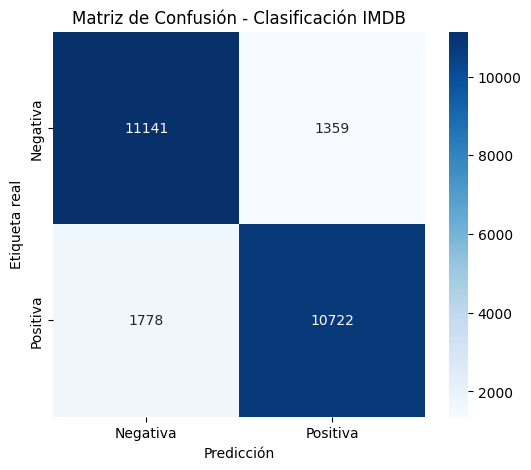


Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88     12500
         1.0       0.89      0.86      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000


--- Crítica #2 ---
<START> this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances austen's the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere rife with sexual tension and psychological trickery it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis

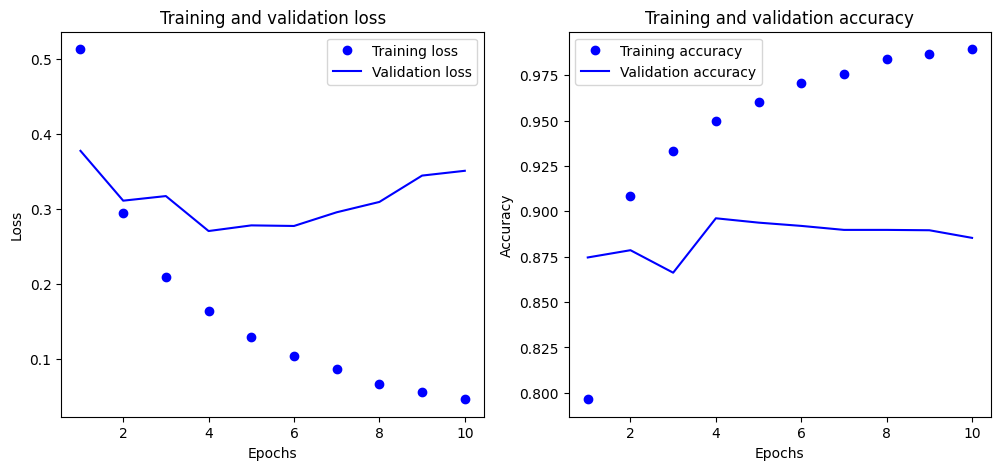

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Definir la cantidad de palabras a considerar en el dataset
num_words = 30000  # Puedes cambiar este valor fácilmente

# 1. Cargar el dataset IMDB con la cantidad de palabras definida
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Obtener el diccionario de palabras
word_index = imdb.get_word_index()
word_index = {k: (v + 3) for k, v in word_index.items()}  # Ajuste de índices
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # Desconocidas
word_index["<UNUSED>"] = 3
reverse_word_index = {v: k for k, v in word_index.items()}  # Invertir diccionario

# 2. Preprocesar los datos: convertir listas de enteros en tensores
def vectorize_sequences(sequences, dimension=num_words):
    results = np.zeros((len(sequences), dimension))  # Matriz de ceros
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0  # Poner 1 en los índices correspondientes a las palabras
    return results

x_train = vectorize_sequences(train_data, dimension=num_words)
x_test = vectorize_sequences(test_data, dimension=num_words)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# 3. Construir la red neuronal
model = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(num_words,)),  # Capa oculta 1
    layers.Dense(16, activation="relu"),  # Capa oculta 2
    layers.Dense(1, activation="sigmoid")  # Capa de salida (clasificación binaria)
])

# 4. Compilar el modelo
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# 5. Entrenar el modelo (validando con 20% de los datos de entrenamiento)
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_split=0.2)

# 6. Evaluar el modelo en el conjunto de prueba
results = model.evaluate(x_test, y_test)
print(f"Precisión en conjunto de prueba: {results[1]:.4f}")

# 7. Obtener predicciones y construir la matriz de confusión
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype("int32")  # Convertir probabilidades en 0 o 1

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Negativa", "Positiva"], yticklabels=["Negativa", "Positiva"])
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de Confusión - Clasificación IMDB")
plt.show()

# 8. Mostrar reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# 9. Mostrar las dos primeras críticas del conjunto de prueba con más palabras reconocidas
def decode_review(text):
    return " ".join([reverse_word_index.get(i, "<UNK>") for i in text])

# Mostrar la primera y segunda crítica
for i in range(1,3):
    sample_review = decode_review(test_data[i])  # Convertir de enteros a palabras
    real_label = "Positiva" if test_labels[i] == 1 else "Negativa"
    predicted_label = "Positiva" if y_pred[i] == 1 else "Negativa"

    print(f"\n--- Crítica #{i+1} ---")
    print(sample_review)
    print(f"\nEtiqueta real: {real_label}")
    print(f"Predicción del modelo: {predicted_label}")

# 10. Graficar la pérdida y la precisión durante el entrenamiento
history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]

epochs = range(1, len(loss_values) + 1)

# Pérdida
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(epochs, acc_values, "bo", label="Training accuracy")
plt.plot(epochs, val_acc_values, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()
# def highlight_important_words(model, review_vector, review_text):
#     with tf.GradientTape() as tape:
#         tape.watch(review_vector)
#         prediction = model(review_vector)
    
#     gradients = tape.gradient(prediction, review_vector).numpy().flatten()
    
#     # Obtener las palabras con mayor importancia según los gradientes
#     importance = np.abs(gradients)
#     word_importance = {reverse_word_index.get(i, "<UNK>"): importance[i] for i in range(len(importance)) if i in reverse_word_index}
    
#     # Ordenar palabras por importancia
#     sorted_words = sorted(word_importance.items(), key=lambda x: x[1], reverse=True)
    
#     # Seleccionar las palabras más importantes
#     top_words = {word for word, _ in sorted_words[:10]}  # Top 10 palabras
    
#     # Resaltar palabras clave en la crítica
#     highlighted_review = " ".join([f"**{word}**" if word in top_words else word for word in review_text.split()])
    
#     return highlighted_review